In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('https://github.com/rajtilakls2510/car_price_predictor/raw/refs/heads/master/quikr_car.csv')

In [66]:
df.to_csv("data/main.csv")

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.shape

(892, 6)

### Basic Info of car dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Here evey data is in object(string) so we have to convert the some cols dtype

In [7]:
# ##Checking quality of each cols

# - need to remove commas and ask for price data in price column adn convert into int
# -in kms_driven there is kms string with nnumbers and commas and convert in int
# - in year col there is garbage value and needs to convert it into numerical dtype
# - in fuel_type there is only nan value present as problem
# - the name cols contain to much garbage data for training so we will have only first 3 words of name 



In [8]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [9]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [10]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [11]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [12]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

## CLeaning

In [13]:
df['year'].str.isnumeric().sum(),len(df['year'])
#so there are 50 non numerics data

(np.int64(842), 892)

In [14]:
df = df[df['year'].str.isnumeric()]

In [15]:
df['year']=df['year'].astype(np.int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [17]:
df = df[df['Price']!='Ask For Price']

In [18]:
df['Price']= df['Price'].str.replace(',','').astype(np.int64)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [20]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [21]:
df=df[df['kms_driven'].str.isnumeric()]

In [22]:
df['kms_driven'] = df['kms_driven'].astype(np.int64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [24]:
df =df[df['fuel_type'].notna()]

In [25]:
df['name']=df['name'].apply(lambda x: " ".join(x.split(" ")[0:3]))

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


<Axes: ylabel='Price'>

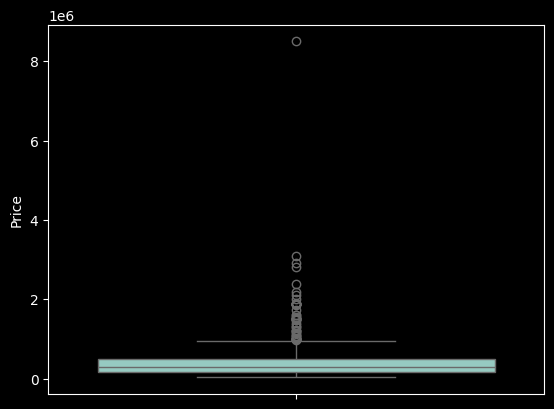

In [28]:
sns.boxplot(df['Price'])

In [29]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


<Axes: xlabel='Price', ylabel='Count'>

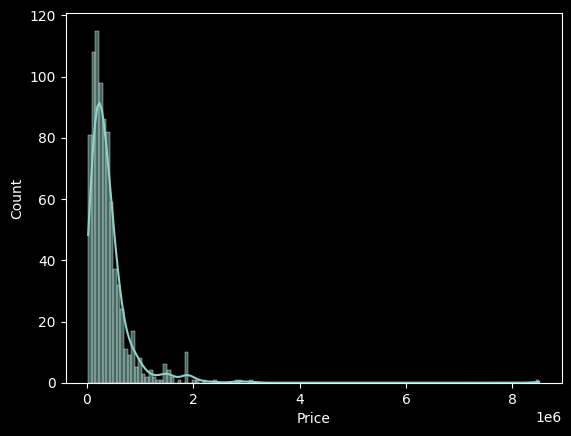

In [30]:
sns.histplot(df['Price'],kde=True)

In [31]:
def handle_outliers(df, column, method="cap", lower_quantile=0.25, upper_quantile=0.75, factor=1.5):
    """
    Handle outliers in a specified column of a DataFrame using the IQR method.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to check for outliers.
        method (str): How to handle outliers. Options are "remove" or "cap".
        lower_quantile (float): The lower quantile to calculate the IQR (default: 0.25).
        upper_quantile (float): The upper quantile to calculate the IQR (default: 0.75).
        factor (float): The multiplier for the IQR to define outlier thresholds (default: 1.5).

    Returns:
        pd.DataFrame: A DataFrame with outliers handled.
    """
    # Calculate IQR
    Q1 = df[column].quantile(lower_quantile)
    Q3 = df[column].quantile(upper_quantile)
    mide = df[column].quantile(0.5)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    if method == "remove":
        # Remove rows with outliers
        filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return filtered_df

    elif method == "cap":
        # Cap the outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        return df

    else:
        raise ValueError("Invalid method. Use 'remove' or 'cap'.")

<Axes: xlabel='year', ylabel='Count'>

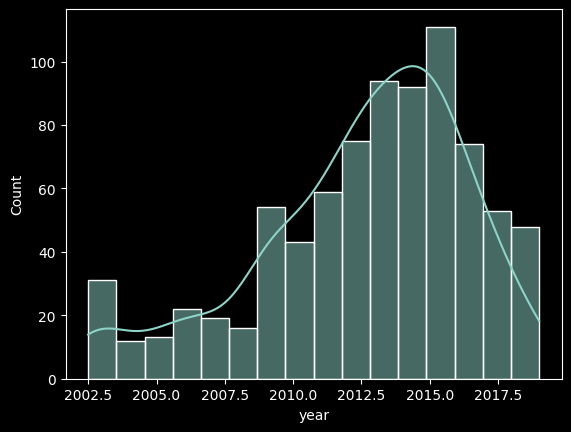

In [32]:
sns.histplot(handle_outliers(df,column='year',)['year'],kde=True)

<Axes: ylabel='Price'>

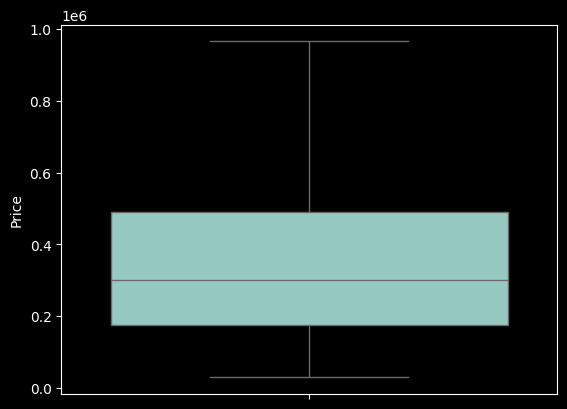

In [33]:
sns.boxplot(handle_outliers(df,column='Price',)['Price'])

In [34]:
df = handle_outliers(df,column='Price',)

In [35]:
df.shape

(816, 6)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

lr  = LinearRegression()


In [40]:
numerical_col = list(df.select_dtypes(exclude='object').columns)
numerical_col.remove('Price')
categorical_col = df.select_dtypes(include='object').columns

ct = ColumnTransformer([
    ("numerical_cols",StandardScaler(),numerical_col),
    ('categorical_col',OneHotEncoder(categories=oh.categories_),categorical_col)
])

In [90]:
pipe = Pipeline(
    steps=[
        ('ColumnTransformer',ct),
        ('model',lr)
    ]
)

In [92]:
pipe

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('numerical_cols',
                                                  StandardScaler(),
                                                  Index(['year', 'Price', 'kms_driven'], dtype='object')),
                                                 ('categorical_col',
                                                  OneHotEncoder(categories=[['Hyundai',
                                                                             'Mahindra',
                                                                             'Ford',
                                                                             'Maruti',
                                                                             'Skoda',
                                                                             'Audi',
                                                                             'Toyota',
                                                                             'Renault',
                                                                             'Honda',
                                                                             'Datsun',
                                                                             'Mitsubishi',
                                                                             'Tata',
                                                                             'Volkswagen',
                                                                             'Chevrolet',
                                                                             'Mini',
                                                                             'BMW',
                                                                             '...
                                                                             'Suzuki '
                                                                             'Wagon',
                                                                             'Toyota '
                                                                             'Innova '
                                                                             '2.0',
                                                                             'Renault '
                                                                             'Lodgy '
                                                                             '85',
                                                                             'Skoda '
                                                                             'Yeti '
                                                                             'Ambition',
                                                                             'Maruti '
                                                                             'Suzuki '
                                                                             'Baleno',
                                                                             'Renault '
                                                                             'Duster '
                                                                             '110',
                                                                             'Renault '
                                                                             'Duster '
                                                                             '85',
                                                                             'Honda '
                                                                             'City '
                                                                             '1.5',
                                                                             'Maruti '
                                                                             'Suzuki '
                   

In [47]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Price'),df['Price'],test_size=0.2,random_state=703)

In [45]:
x_train=ct.fit_transform(x_train).toarray()
x_test=ct.fit_transform(x_test).toarray()

In [49]:
x_train.iloc[0]

name          Hyundai Santro Xing
company                   Hyundai
year                       2014.0
kms_driven                  57000
fuel_type                  Petrol
Name: 612, dtype: object

In [39]:
oh = OneHotEncoder()
oh.fit(df[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [1]:
oh

NameError: name 'os' is not defined

In [109]:
oh.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [116]:
lr.fit(x_train,y_train)

LinearRegression()

In [117]:
y_pred = lr.predict(x_test)

In [119]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.7385490508009063

In [120]:
score = []
for i in range(1000):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Price'),df['Price'],test_size=0.2,random_state=i)
    x_train=ct.fit_transform(x_train).toarray()
    x_test=ct.fit_transform(x_test).toarray()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score.append(r2_score(y_true=y_test,y_pred=y_pred))
    

In [121]:
len(score)

1000

In [125]:
score[np.argmax(score)]

0.8516401780436373

In [58]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Price'),df['Price'],test_size=0.2,random_state=703)
x_train=ct.fit_transform(x_train).toarray()
x_test=ct.fit_transform(x_test).toarray()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_true=y_test,y_pred=y_pred)

0.8516401780436373

In [63]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007.0,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006.0,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014.0,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014.0,575000.0,36000,Diesel
4,Ford Figo,Ford,2012.0,175000.0,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011.0,270000.0,50000,Petrol
812,Tata Indica V2,Tata,2009.0,110000.0,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009.0,300000.0,132000,Petrol
814,Tata Zest XM,Tata,2018.0,260000.0,27000,Diesel


In [60]:
test_df = pd.read_csv("../artifacts/x_test.csv")
x_test=test_df.drop(columns='Price')
y_test=test_df['Price']

In [61]:
x_test = ct.transform(x_test)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(x_test))

0.2425375982006054